| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Lion DUNGL</p> | 01553060 | 22.04.2020                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 (Assignment) -- Drug Discovery </h2>

<b>Authors:</b> Brandstetter, Schimunek, Schäfl<br>
<b>Date:</b> 30-03-2020

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0

- Import the same modules as discussed in the lecture notebook.
- Check if your model versions are correct.

In [1]:
import u4_utils as u4
import rdkit
import pandas as pd
import numpy as np
import sys
import scipy
import scipy.sparse as sp
import sklearn
import matplotlib
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from functools import partial
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from distutils.version import LooseVersion

In [2]:
# can't manage to install the newer version of rdkit 2019.03.3, in the terminal using apt-get cache madison python-rdkit
# it only displays one version

u4.check_module_versions()

Installed Python version: 3.7 (✓)
Installed numpy version: 1.18.1 (✓)
Installed pandas version: 1.0.3 (✓)
Installed scikit-learn version: 0.23.1 (✓)
Installed scipy version: 1.4.1 (✓)
Installed matplotlib version: 3.1.3 (✓)
Installed rdkit version: 2020.03.2 (✓)


# Exercise 1

We are looking at the lowest unoccupied molecular orbital energy (LUMO). You can access the values by <code>GetProp('LUMO')</code>. 

- Print <i>name</i> and <i>LUMO value</i> of the first $10$ molecules
- Which of (all) molecules has the <i>highest</i> LUMO value? Write a short piece of code to figure this out.

NOTA BENE: If you access  <code>GetProp('LUMO')</code> a string is returned. You might want to convert this string to a float value for the second task (<code>float()</code>).

In [5]:
# Load Dataset
suppl = Chem.SDMolSupplier('resources/molecules.sdf')

In [6]:
lumo = dict()

for n, mol in enumerate(suppl):
    lumo[str(mol.GetProp('Compound Name'))] = [float(mol.GetProp('LUMO')), n] 
    if n <= 9:
        print(mol.GetProp('Compound Name') + ": " + mol.GetProp('LUMO'))

2-nitrophenanthrene: -1.246
8-nitroquinoline: -1.429
5-nitroquinoline: -1.456
1-nitrofluoranthene: -1.591
2,5-difluoronitrobenzene: -1.59
1,3,6,8-tetranitropyrene: -3.406
3-methyl-4-nitrobiphenyl: -1.144
2-acetoxy-7-nitrofluorene: -1.437
2-methyl-7-nitrofluorene: -1.387
9-nitrophenanthrene: -1.254


In [7]:
highest_lumo = max(lumo, key=lambda key: lumo[key])
print('Molecule with highest LUMO-value: ' + highest_lumo + f', {lumo[highest_lumo][0]}')

Molecule with highest LUMO-value: 2-nitro-m-phenylenediamine, -0.529


# Exercise 2

- Find the molecule in <i>suppl</i> with the <i>highest</i> and the molecule with the <i>lowest</i> number of bonds and print their respective names.
- Draw the molecule with the <i>highest</i> number of bonds both <i>with</i> and <i>without</i> atoms numbered.
- For the molecule with the <i>highest</i> number of bonds, print the atoms (<code> GetIdx() </code>, <code> GetSymbol() </code>), their masses and check if they are in the ring. Compare the results with the drawing.

In [8]:
bonds = dict()

for n, mol in enumerate(suppl):
    bonds[str(mol.GetProp('Compound Name'))] = [mol.GetNumBonds(), n]

highest_bonds = max(bonds, key=lambda key: bonds[key])
print('Molecule with highest number of bonds: ' + highest_bonds + f', {bonds[highest_bonds][0]} bonds')

lowest_bonds = min(bonds, key=lambda key: bonds[key]) 
print('Molecule with lowest number of bonds: ' + lowest_bonds + f', {bonds[lowest_bonds][0]} bonds')

Molecule with highest number of bonds: 5,8-dinitrobenzo[ghi]perylene, 33 bonds
Molecule with lowest number of bonds: nitrobenzene, 9 bonds


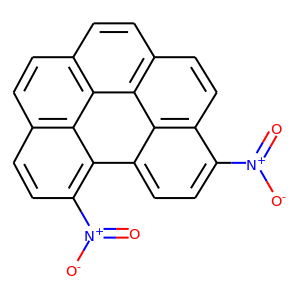

In [9]:
biggest_mol = suppl[bonds[highest_bonds][1]]

Draw.MolToImage(biggest_mol)

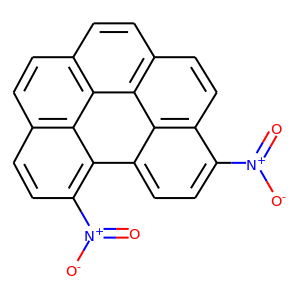

In [10]:
Draw.MolToImage(biggest_mol, includeAtomNumbers=True)

In [11]:
biggest_mol.GetProp('Formula')

'C22H10N2O4'

In [17]:
from tabulate import tabulate

l = list()

for at in biggest_mol.GetAtoms():
    l.append([str(at.GetIdx()), at.GetSymbol(), str(at.GetMass()), at.IsInRing()])
    
table = tabulate(l, headers=['Symbol', 'Mass', 'Is In Ring'], tablefmt='orgtbl')
print(table)

|    | Symbol   |   Mass | Is In Ring   |
|----+----------+--------+--------------|
|  0 | C        | 12.011 | True         |
|  1 | C        | 12.011 | True         |
|  2 | C        | 12.011 | True         |
|  3 | C        | 12.011 | True         |
|  4 | C        | 12.011 | True         |
|  5 | C        | 12.011 | True         |
|  6 | C        | 12.011 | True         |
|  7 | C        | 12.011 | True         |
|  8 | C        | 12.011 | True         |
|  9 | C        | 12.011 | True         |
| 10 | C        | 12.011 | True         |
| 11 | C        | 12.011 | True         |
| 12 | C        | 12.011 | True         |
| 13 | C        | 12.011 | True         |
| 14 | C        | 12.011 | True         |
| 15 | C        | 12.011 | True         |
| 16 | C        | 12.011 | True         |
| 17 | C        | 12.011 | True         |
| 18 | C        | 12.011 | True         |
| 19 | C        | 12.011 | True         |
| 20 | C        | 12.011 | True         |
| 21 | C        | 12.011 | True   

# Comparision with drawing

The atoms with the IDs 22 - 27 are part of substituents (they subsitute H-atoms) as can be seen in the drawing and therefore they are not in any ring (see table). Moreover, these atoms are heavier than the rest. In particular, the subsituents are two NO2 (Nitrogen dioxide). 

The rest of the molecule is made up of six rings which are consisting of 21 C-atoms. As a result, all C-atoms are part of a ring, which can be recognised in the table above, too.

# Exercise 3

- Draw all moleculs that contain the smiles string <i>C(=O)O</i>.
- How many molecules have the element <i>Iodine</i> inside? Draw these molecules together with their names.
- How many molecules have the element <i>Bromine</i> inside? Draw these molecules together with their names and their formula.
- How many molecules have the element <i>Chlorine</i> inside? Which of these molecules contains the <i>most</i> atoms? Draw the molecule with the most atoms and get its name and formula.

In [11]:
def search_substruct(patt_smiles):
    patt = Chem.MolFromSmiles(patt_smiles)
    results = list()
    names = list()
    formula = list()

    for mol in suppl:
        if mol.HasSubstructMatch(patt):
            results.append(mol)
            names.append(mol.GetProp('Compound Name'))
            formula.append(mol.GetProp('Formula'))
    
    print(f'{len(results)} match') if (len(results) == 1) else print(f'{len(results)} matches')
    
    return results, names, formula

3 matches


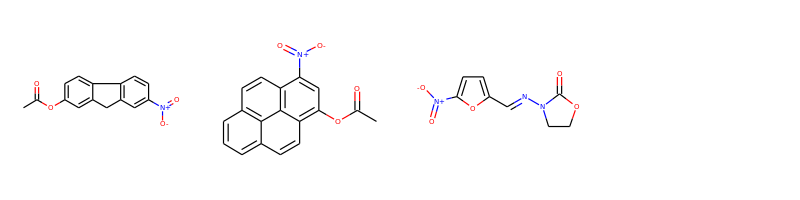

In [12]:
# C(=O)O

results, _, _ = search_substruct('C(=O)O')

Draw.MolsToGridImage([_ for _ in results], molsPerRow=4)

1 match


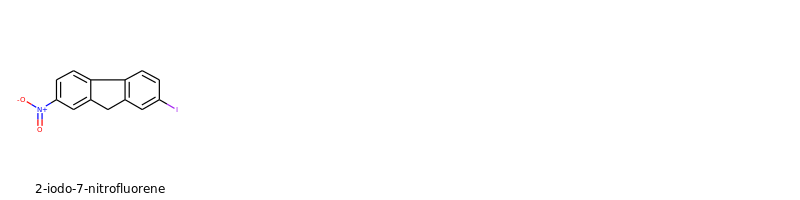

In [13]:
# Iodide

results, names, _ = search_substruct('I')

Draw.MolsToGridImage([_ for _ in results], molsPerRow=4, legends=names)

2 matches


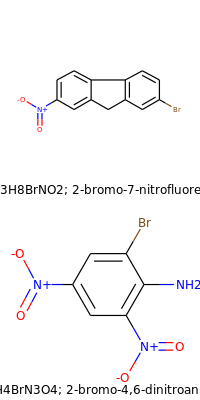

In [14]:
# Bromine

results, names, formula = search_substruct('Br')
legend = list()

for n in range(len(names)):
    legend.append(f'{formula[n]}; {names[n]}')

Draw.MolsToGridImage([_ for _ in results], molsPerRow=1, legends=legend)

16 matches

Molecule with highest number of atoms and substruct "Cl": 3-nitro-1,2,4,7,8-pentachlorodibenzo-1,4-dioxin,
22 atoms


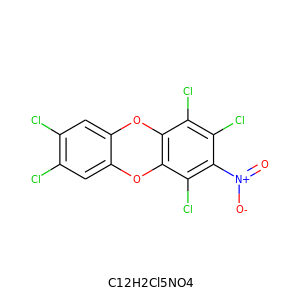

In [15]:
# Chlorine

results, _, _ = search_substruct('Cl')

num_atoms = dict()

for n, mol in enumerate(results):
    num_atoms[str(mol.GetProp('Compound Name'))] = [mol.GetNumAtoms(), n]

max_atoms = max(num_atoms, key=lambda key: num_atoms[key])
print('\nMolecule with highest number of atoms and substruct "Cl": ' + max_atoms + 
      f',\n{num_atoms[max_atoms][0]} atoms')

biggest_mol_cl = results[num_atoms[max_atoms][1]]

Draw.MolToImage(biggest_mol_cl, legend=biggest_mol_cl.GetProp('Formula'))